# Exploratory data analysis

### import classics CSV file as a dataframe

In [2]:

import pandas as pd

file_path = 'classics.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Check if the file is loaded sucessfully
df.head()


,bibliography.congress classifications,bibliography.languages,bibliography.subjects,bibliography.title,bibliography.type,metadata.downloads,metadata.id,metadata.rank,metadata.url,bibliography.author.birth,...,metrics.sentiments.polarity,metrics.sentiments.subjectivity,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
0,PR,en,"Sisters -- Fiction,Courtship -- Fiction,Social...",Pride and Prejudice,Text,36576,1342,1,https://www.gutenberg.org/ebooks/1342,1775,...,0.136713,0.522239,4.83,18.0,0.05,586794,4603,6511,170648.1,121533
1,PS,en,"Mentally ill women -- Fiction,Feminist fiction...",The Yellow Wallpaper,Text,26363,1952,2,https://www.gutenberg.org/ebooks/1952,1860,...,0.054174,0.534787,4.41,15.0,0.06,26769,102,385,7686.9,6067
2,"PZ,PR",en,Fantasy,Alice's Adventures in Wonderland,Text,18882,11,3,https://www.gutenberg.org/ebooks/11,1832,...,0.041079,0.497276,4.65,17.0,0.06,122719,339,1501,33810.3,26389
3,PR,en,Monsters -- Fiction;Frankenstein's monster (Fi...,"Frankenstein; Or, The Modern Prometheus",Text,17128,84,4,https://www.gutenberg.org/ebooks/84,1797,...,0.100902,0.539516,4.77,23.0,0.04,357604,2604,3239,106802.1,74959
4,PT,en,"Psychological fiction,Metamorphosis -- Fiction",Metamorphosis,Text,15683,5200,5,https://www.gutenberg.org/ebooks/5200,1883,...,0.041997,0.479019,4.56,27.0,0.04,100372,397,800,28752.3,22022


### check missing data

In [6]:
missing_data = df.isnull().sum()

print(missing_data)

bibliography.congress classifications              159
bibliography.languages                               0
bibliography.subjects                              155
bibliography.title                                   0
bibliography.type                                    0
metadata.downloads                                   0
metadata.id                                          0
metadata.rank                                        0
metadata.url                                         0
bibliography.author.birth                            0
bibliography.author.death                            0
bibliography.author.name                             0
bibliography.publication.day                         0
bibliography.publication.full                        0
bibliography.publication.month                       0
bibliography.publication.month name                  0
bibliography.publication.year                        0
metadata.formats.total                               0
metadata.f

We see 159 missing data in "bibliography.congress classifications" column and 155 in "bibliography.subjects" colum.

How many authors are in the dataset?

In [87]:
len(df["bibliography.author.name"].unique())

555

There are 555 authors in this dataset.

Number of publications in each year?


By making the number of bins equal to the number of total unique value, we get a histogram like this:

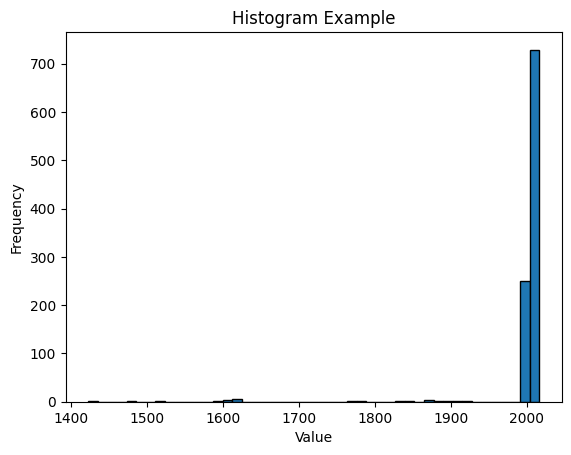

In [17]:
import matplotlib.pyplot as plt

dt1 = df["bibliography.publication.year"]

# Create a histogram
plt.hist(dt1, bins= len(df["bibliography.publication.year"].unique()), edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Example')

# Show the plot
plt.show()


We see the publication year is highly skewed to the left, where we observe most of books in this dataset are published in late 20th centery or after 2000s. In other words, most of them are published in recent 30 years.

Relationship between number of difficul words and reading ease (metrics.difficulty.flesch reading ease)?

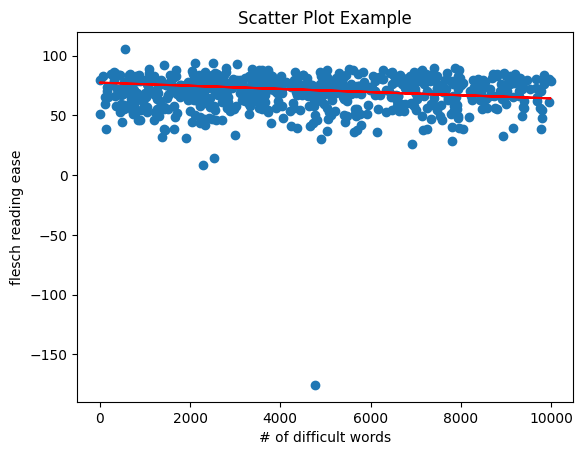

In [76]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = df["metrics.difficulty.difficult words"]
y = df["metrics.difficulty.flesch reading ease"]

x = [xi for xi in x if xi < 10000]
y = [y[i] for i, xi in enumerate(x) if xi < 10000]
# Create a scatter plot
plt.scatter(x, y)


# Add labels and title
plt.xlabel('# of difficult words')
plt.ylabel('flesch reading ease')
plt.title('Scatter Plot Example')

lm = LinearRegression()
x = np.array(filtered_x).reshape(-1, 1)
y = np.array(filtered_y).reshape(-1, 1)
lm.fit(x,y )

# Get the coefficients of the linear model
slope = lm.coef_[0]
intercept = lm.intercept_
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')

# Show the plot
plt.show()

In [75]:
slope

array([-0.00131749])

The slope is -0.00131749, which says there isn't an obvious negative relation between number of difficult words and flesch reading ease. This contradicts to my expectation, that there must be a obvious negative relationship bewteen this two variables. 

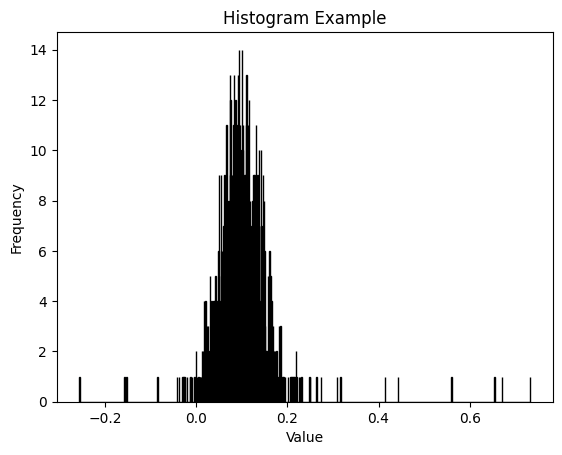

In [85]:
dt = df["metrics.sentiments.polarity"]

# Create a histogram
plt.hist(dt, bins= len(df["metrics.sentiments.polarity"].unique()), edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Example')

# Show the plot
plt.show()


Sentiments polarity shows to center around 0.1 with a seemingly normal distribution.

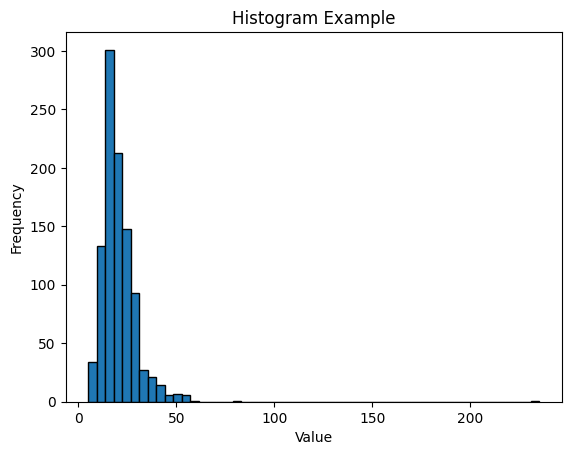

In [83]:
dt = df["metrics.statistics.average sentence length"]

# Create a histogram
plt.hist(dt, bins= len(df["metrics.statistics.average sentence length"].unique()), edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Example')

# Show the plot
plt.show()


Majority of sentence length stay between 0 and 50 with a center around 30 (words).